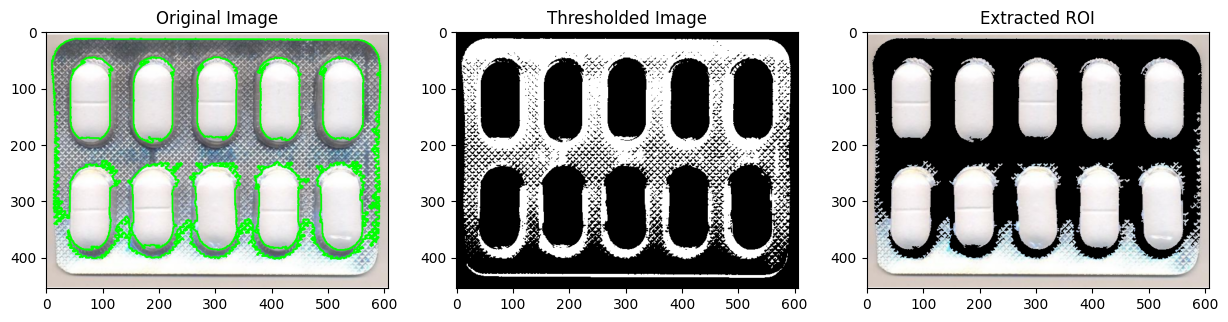

In [2]:
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Read an image (assuming 'image' is your image variable)
image = cv2.imread("tablets.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adaptive thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Get contours
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Set the minimum and maximum contour area thresholds
min_contour_area_threshold = 5000
max_contour_area_threshold = 200000

# Filter contours based on area
filtered_contours = [cnt for cnt in contours if min_contour_area_threshold < cv2.contourArea(cnt) < max_contour_area_threshold]

# Draw contours on the original image
contour_image = cv2.drawContours(image.copy(), filtered_contours, -1, (0, 255, 0), 2)

# Create a mask for the largest contour
mask = np.ones_like(gray, dtype=np.uint8) * 255
cv2.drawContours(mask, filtered_contours, -1, 0, thickness=cv2.FILLED)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)

# Draw bounding boxes on the original image
for cnt in filtered_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(15, 5))


# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Thresholded Image
plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')

# Extracted Region of Interest (ROI)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Extracted ROI')

plt.show()

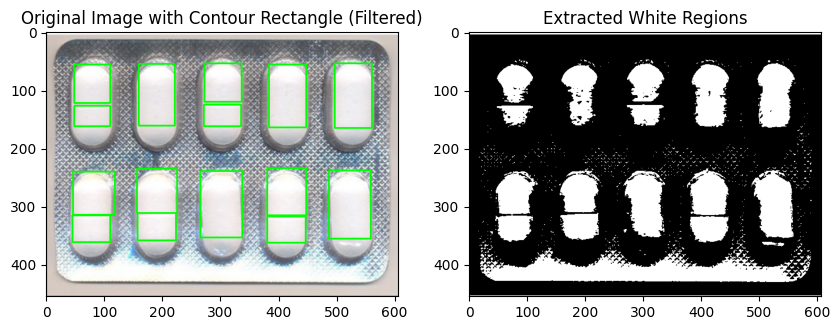

In [42]:
import cv2
import matplotlib.pyplot as plt

# Read the image (assuming 'image' is your image variable)
image = cv2.imread('tablets.png', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)  # Adjust the threshold as needed

# Find contours
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Set the minimum and maximum contour area thresholds
min_contour_area_threshold = 500
max_contour_area_threshold = 7000

# Draw rectangles around the filtered contours
for cnt in contours:
    contour_area = cv2.contourArea(cnt)
    if min_contour_area_threshold < contour_area < max_contour_area_threshold:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contour Rectangle (Filtered)')

# Extracted White Regions
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2RGB))
plt.title('Extracted White Regions')

plt.show()



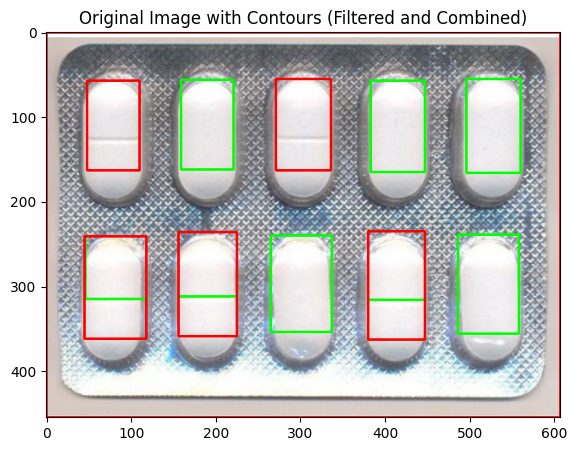

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image (assuming 'image' is your image variable)
image = cv2.imread('tablets.png', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)  # Adjust the threshold as needed

# Find contours
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on the original image
#cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Set the minimum and maximum contour area thresholds
min_contour_area_threshold = 500
max_contour_area_threshold = 7000

min_contour_area_threshold1 = 3000
max_contour_area_threshold2 = 7000

# Set the minimum distance threshold for combining rectangles
min_distance_threshold = 100

# Draw rectangles around the filtered contours
for cnt in contours:
    contour_area = cv2.contourArea(cnt)
    if min_contour_area_threshold1 < contour_area < max_contour_area_threshold2:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


# Draw rectangles around the filtered and combined contours
for i in range(len(contours)):
    for j in range(i + 1, len(contours)):
        # Get bounding rectangles for the two contours
        x1, y1, w1, h1 = cv2.boundingRect(contours[i])
        x2, y2, w2, h2 = cv2.boundingRect(contours[j])

        # Calculate the distance between the centers of the rectangles
        center1 = (x1 + w1 // 2, y1 + h1 // 2)
        center2 = (x2 + w2 // 2, y2 + h2 // 2)
        distance = np.sqrt((center1[0] - center2[0]) ** 2 + (center1[1] - center2[1]) ** 2)

        # Check if contour areas are within specified thresholds
        contour_area_1 = cv2.contourArea(contours[i])
        contour_area_2 = cv2.contourArea(contours[j])
        valid_area = (min_contour_area_threshold < contour_area_1 < max_contour_area_threshold) and \
                     (min_contour_area_threshold < contour_area_2 < max_contour_area_threshold)

        # If the distance is below the threshold and contour areas are valid, combine the contours
        if distance < min_distance_threshold and valid_area:
            # Create a combined bounding rectangle
            x_combined = min(x1, x2)
            y_combined = min(y1, y2)
            w_combined = max(x1 + w1, x2 + w2) - x_combined
            h_combined = max(y1 + h1, y2 + h2) - y_combined

            # Draw the combined rectangle in red
            cv2.rectangle(image, (x_combined, y_combined), (x_combined + w_combined, y_combined + h_combined), (0, 0, 255), 2)

# Display the results
plt.figure(figsize=(10, 5))

# Original Image with Contours
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Contours (Filtered and Combined)')

plt.show()
